# T90 - Hardness Ratio

This notebook processes all catalogues _(CGRO/BATSE, FERMI/GBM, SWIFT/BAT)_ in T90-Spectral Hardness feature space. On each catalogue, it performs the following operations, respectively.
<ol>
    <li> Loads the data in T90-Hrd space. The outliers are not included in the data. </li>
    <li> Creates models with n_components ranging from 1 to 10. </li>
    <li> Displays the model with 3 clusters. The decision boundaries are drawn and each cluster is colored differently. </li>
    <li> Performs several performance metrics: </li>
    <ol>
        <li> AIC (Akaike Information Criterion), </li>
        <li> BIC (Bayesian Information Criterion),  </li>
        <li> WCSS (Within-Cluster Sum of Squares), </li>
        <li> Silhouette Score, </li>
        <ul>
            <li> Euclidean distance </li> 
            <li> Mahalanobis distance </li> 
        </ul>
        <li> Gap Statistics, </li>
        <li> Davies Bouldin, </li>
        <li> Calinski-Harabsz </li>
    </ol>
    <li> Merges the scores together and plots the scores as different plots: </li>
    <ol> 
        <li> Line plot, </li>
        <li> Radar plot, </li>
        <li> Line plot with parallel coordinates, </li>
        <li> Heatmap </li>
    </ol>

</ol>

In [261]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [262]:
# add grbttools to path
import sys
sys.path.append("../")

import warnings
from grbtools import data as data_operations
from grbtools import disp as disp_operations
from grbtools import stats as stats_operations
from grbtools import models as model_operations
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(font_scale=1)
warnings.filterwarnings("ignore")
np.random.seed(1773)

## 1. BATSE

### 1.1. Load Data and Create Models

--------------------------
Catalogue BATSE loaded.
Number of GRBs: 1924
Number of features: 2
Features: Index(['lgT90', 'lgHrd'], dtype='object')
--------------------------


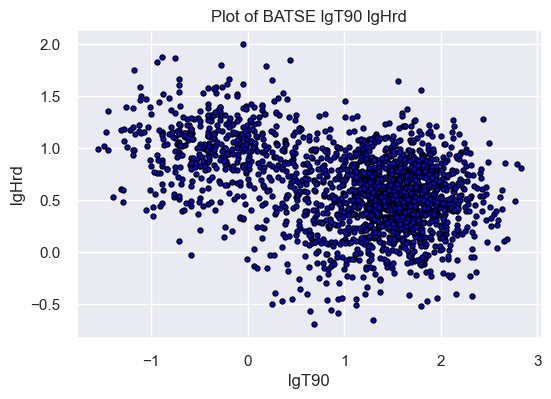

In [263]:
df_batse_t90_hrd = data_operations.load(cat_name="batse",
                                        feats=["lgT90", "lgHrd"],
                                        without_outliers=True,
                                        plot_data=True,
                                        verbose=True)

In [272]:
model_operations.createGMMs(dataset_name='batse', 
                          data=df_batse_t90_hrd,
                          cov_type='full',
                          n_clusters_max=10,
                          verbose=True,
                          max_iter=10000,
                          n_init=100,
                          sorting_clusters=True,
                          plot_model=False)



Overwriting on the existing model...
Model is saved to ../models/batse/batse_lgT90_lgHrd_N1_Cfull.model
Model with 1 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/batse/batse_lgT90_lgHrd_N2_Cfull.model
Model with 2 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/batse/batse_lgT90_lgHrd_N3_Cfull.model
Model with 3 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/batse/batse_lgT90_lgHrd_N4_Cfull.model
Model with 4 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/batse/batse_lgT90_lgHrd_N5_Cfull.model
Model with 5 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/batse/batse_lgT90_lgHrd_N6_Cfull.model
Model with 6 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/batse/batse_lgT90_lgHrd_N7_Cfull.model
Model with 7 components has been

(<Figure size 640x440 with 1 Axes>,
 <Axes: title={'center': 'BATSE'}, xlabel='lgT90', ylabel='lgHrd'>)

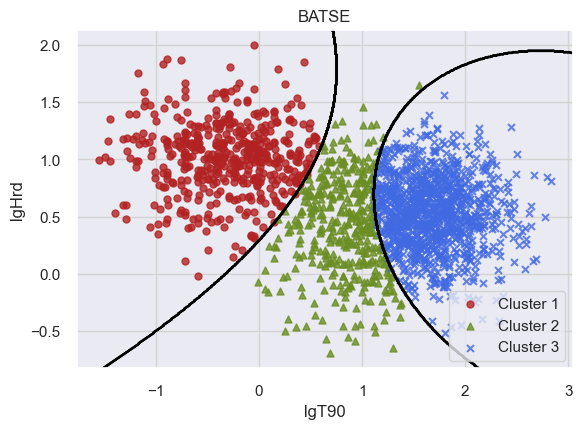

In [192]:
disp_operations.scatter2DWithClusters(cat_name="batse",
                                      feat_space=["lgT90", "lgHrd"],
                                      n_components=3,
                                      data=df_batse_t90_hrd,
                                      title="BATSE",
                                      xlabel="lgT90",
                                      ylabel="lgHrd",)

### 1.2. Calculate Performance Scores  

In [159]:
# Bring all models
models_batse = model_operations.bring_all_models(cat_name="batse",
                                  feat_space=["lgT90", "lgHrd"])

# Bring all predictions
preds_batse = model_operations.bring_all_predictions(cat_name = "batse", 
                             feat_space = ["lgT90", "lgHrd"], 
                             data = df_batse_t90_hrd)  

# Keep scores
scores_batse = dict()

#### 1.2.1. AIC (Akaike Information Criterion)

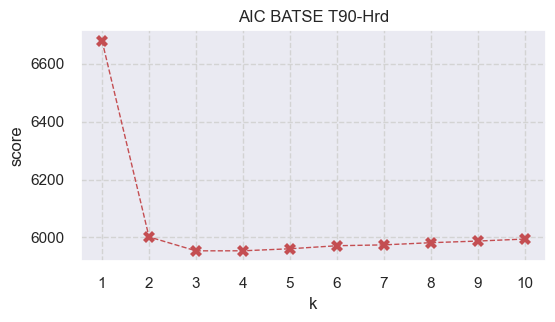

In [193]:
scores_batse["aic"] = {k: model.aic(df_batse_t90_hrd) for k, model in models_batse.items()}
disp_operations.plot_scores(scores_batse["aic"], "AIC BATSE T90-Hrd")

#### 1.2.2. BIC (Bayesian Information Criterion)

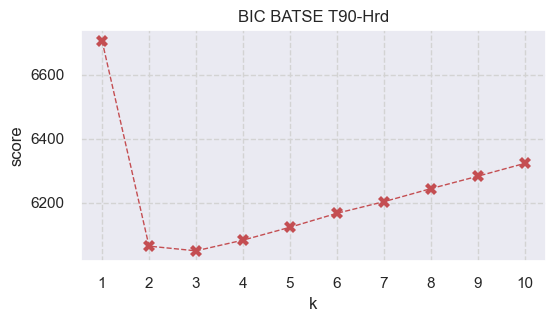

In [194]:
scores_batse["bic"] = {k: model.bic(df_batse_t90_hrd) for k, model in models_batse.items()}
disp_operations.plot_scores(scores_batse["bic"], "BIC BATSE T90-Hrd")

#### 1.2.3. WCSS (Within-Cluster Sum of Squares)

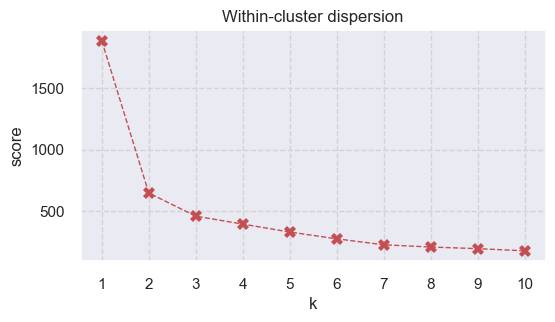

In [195]:
scores_batse["wcss"] = {
    k: stats_operations.intra_cluster_dispersion(df_batse_t90_hrd.values, preds_batse[k]) for k in models_batse.keys()
}
disp_operations.plot_scores(scores_batse["wcss"], "Within-cluster dispersion")


#### 1.2.4 Silhouette Score

Euclidean distance

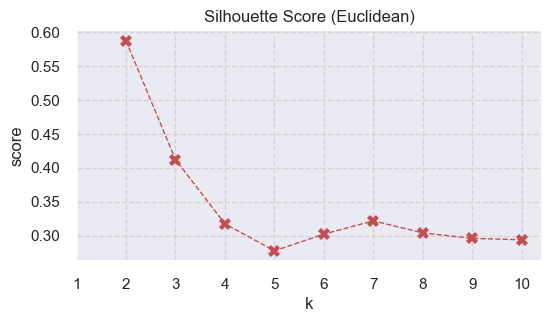

In [196]:
scores_batse["sil_euc"] = {
    k: stats_operations.silhouette_score(df_batse_t90_hrd.values, preds_batse[k], metric="Euclidean")["mean"]
    for k in models_batse.keys()
}

disp_operations.plot_scores(scores_batse["sil_euc"], "Silhouette Score (Euclidean)")

Mahalanobis distance

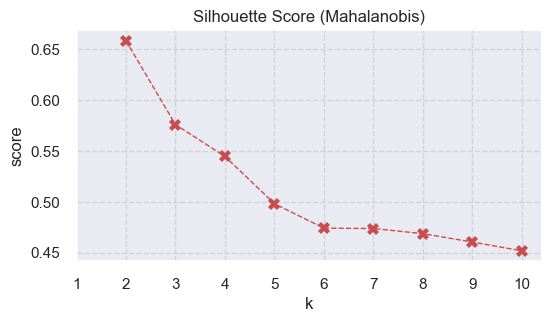

In [197]:
scores_batse["sil_mah"] = {
    k: stats_operations.silhouette_score(df_batse_t90_hrd, preds_batse[k], metric="Mahalanobis")["mean"]
    for k in models_batse.keys()
}

disp_operations.plot_scores(scores_batse["sil_mah"], "Silhouette Score (Mahalanobis)")

#### 1.2.5. Gap Statistics

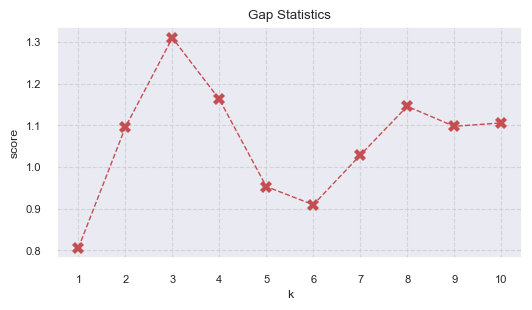

In [167]:
scores_batse["gap"] = {
    k: stats_operations.gap_statistics(
        df_batse_t90_hrd.values, preds_batse[k], clusterer=models[k], n_repeat=10, random_state=22
    )["gap"]
    for k in models_batse.keys()
}

disp_operations.plot_scores(scores_batse["gap"], "Gap Statistics")

#### 1.2.6. Davies-Bouldin

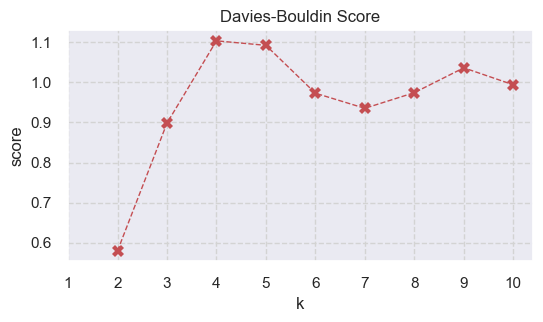

In [198]:
scores_batse["dbs"] = {k: stats_operations.davies_bouldin_score(df_batse_t90_hrd, preds_batse[k]) for k in models_batse.keys()}

disp_operations.plot_scores(scores_batse["dbs"], "Davies-Bouldin Score")

#### 1.2.7. Calinski-Harabasz

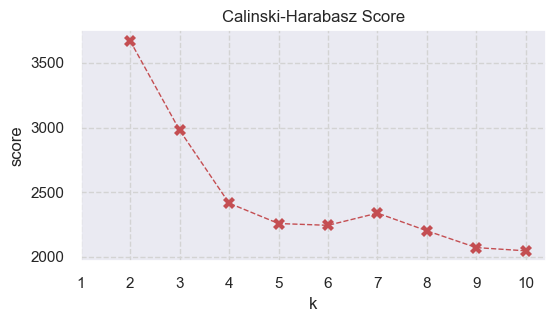

In [199]:
scores_batse["chs"] = {
    k: stats_operations.calinski_harabasz_score(df_batse_t90_hrd, preds_batse[k]) for k in models_batse.keys()
}

disp_operations.plot_scores(scores_batse["chs"], "Calinski-Harabasz Score")

### 1.3. Merging and Normalizing Scores

In [170]:
df_merged_scores_batse = data_operations.merge_scores(scores_batse)
df_merged_scores_batse

,aic,bic,chs,dbs,gap,sil_euc,sil_mah,wcss
k,,,,,,,,
1,6679.11,6706.93,NaN,NaN,0.81,NaN,NaN,1887.71
2,6001.99,6063.17,3671.08,0.58,1.10,0.59,0.66,648.69
3,5953.89,6048.45,2979.44,0.90,1.31,0.41,0.58,460.20
4,5954.02,6081.95,2414.52,1.10,1.16,0.32,0.54,395.52
5,5961.03,6122.33,2257.12,1.09,0.95,0.28,0.50,330.90
6,5971.51,6166.19,2243.25,0.97,0.91,0.30,0.47,275.66
7,5974.45,6202.50,2337.76,0.94,1.03,0.32,0.47,226.97
8,5982.00,6243.42,2200.72,0.97,1.15,0.30,0.47,208.81
9,5987.65,6282.45,2070.73,1.04,1.10,0.30,0.46,195.61


In [171]:
df_normalized_scores_batse = data_operations.normalize_scores(df_merged_scores_batse)
df_normalized_scores_batse

,aic,bic,chs,dbs,gap,sil_euc,sil_mah,wcss
k,,,,,,,,
2,0.00,0.95,1.00,1.00,0.48,1.00,1.00,0.00
3,1.00,1.00,0.57,0.38,1.00,0.42,0.62,0.40
4,1.00,0.88,0.23,0.00,0.62,0.13,0.43,0.54
5,0.85,0.73,0.13,0.02,0.10,0.00,0.24,0.67
6,0.63,0.57,0.12,0.25,0.00,0.06,0.10,0.79
7,0.57,0.44,0.18,0.31,0.30,0.13,0.10,0.90
8,0.42,0.29,0.10,0.25,0.60,0.06,0.10,0.93
9,0.30,0.15,0.02,0.12,0.48,0.06,0.05,0.96
10,0.15,0.00,0.00,0.21,0.50,0.03,0.00,1.00


### 1.4. Visualizing Statistics

#### 1.4.1. Line Plot

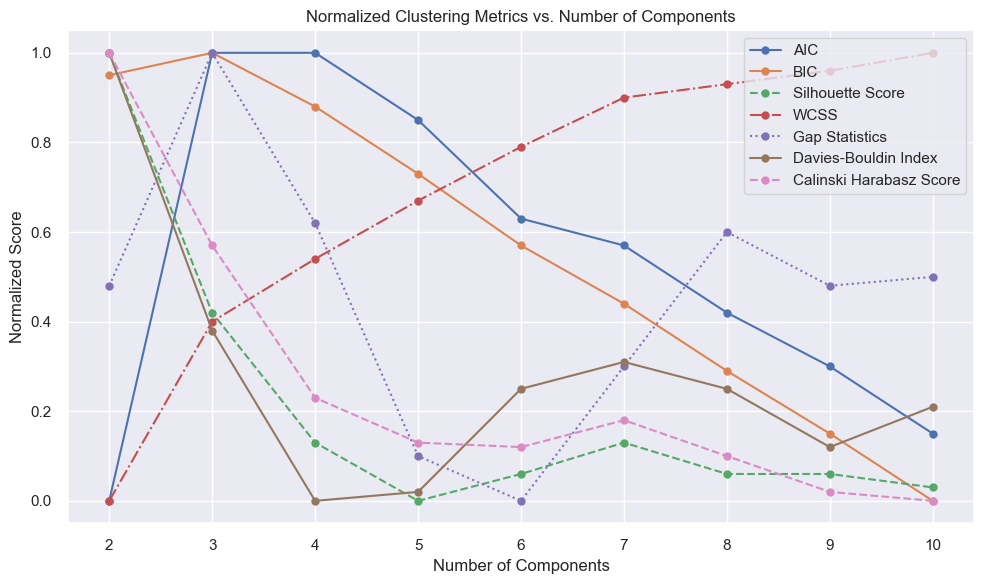

In [200]:
disp_operations.plot_scores_all(df_normalized_scores_batse)

#### 1.4.2. Radar Plot

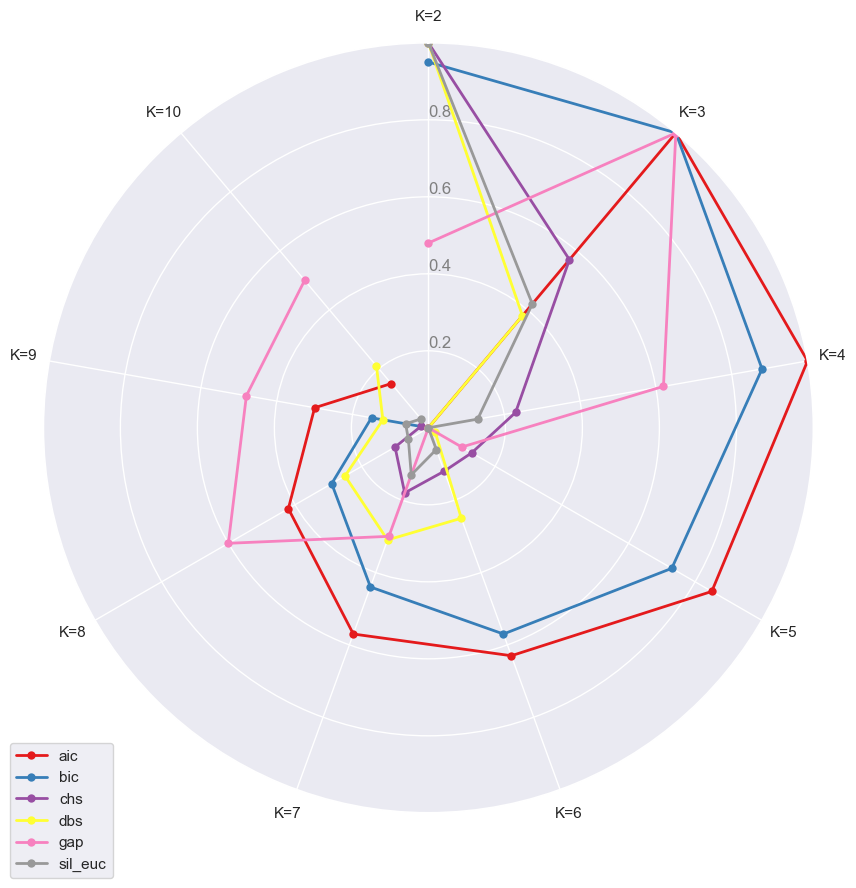

In [201]:
disp_operations.plot_radar(df_normalized_scores_batse)

#### 1.4.3. Parallel Coordinates

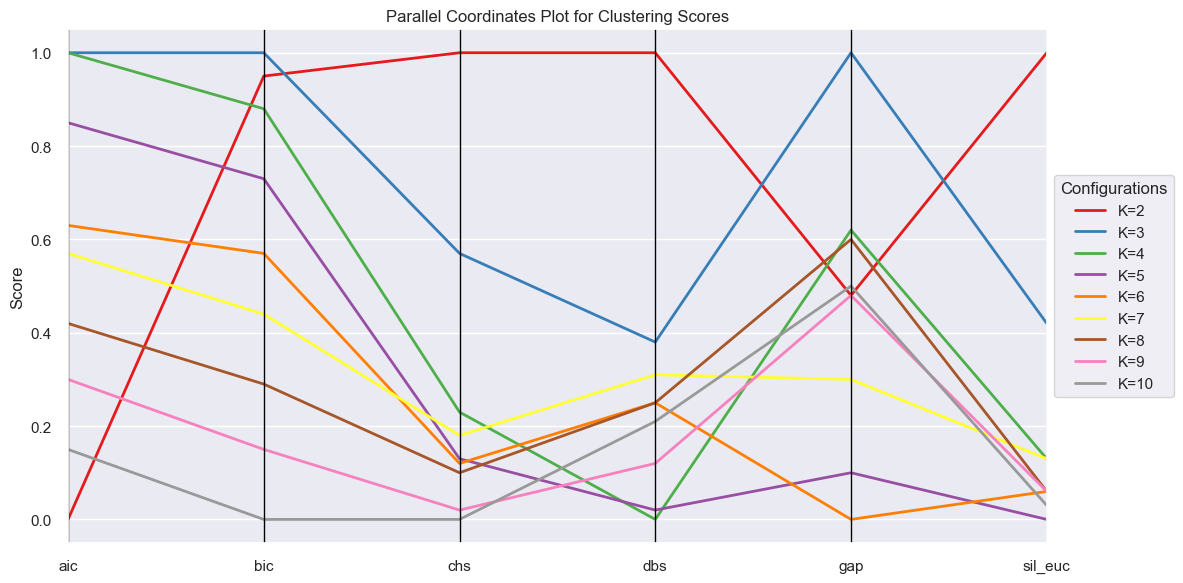

In [207]:
disp_operations.plot_parallel_coord(df_normalized_scores_batse)

#### 1.4.4. Heatmap

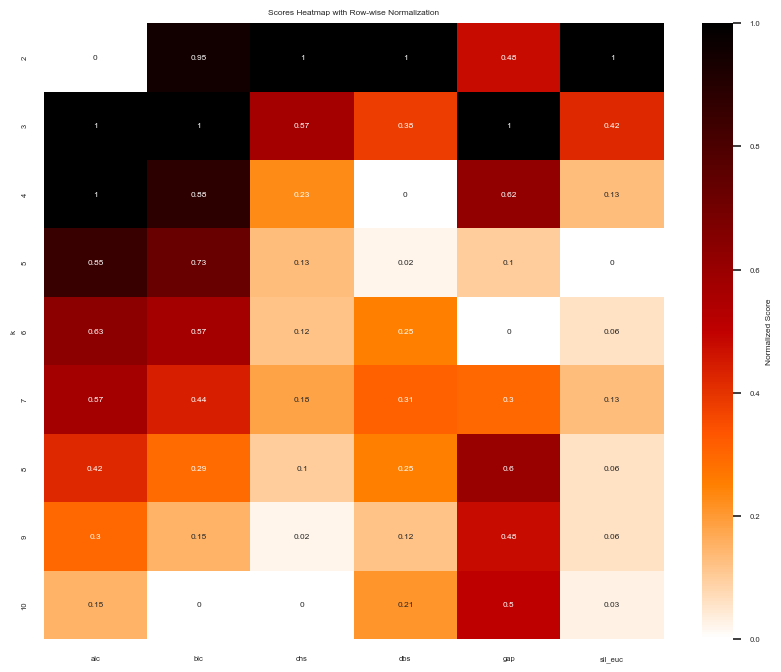

In [208]:
disp_operations.plot_heatmap(df_normalized_scores_batse)

-------

## 2. FERMI

### 2.1. Load Data and Create Models

--------------------------
Catalogue FERMI loaded.
Number of GRBs: 2291
Number of features: 2
Features: Index(['lgT90', 'lgHrd'], dtype='object')
--------------------------


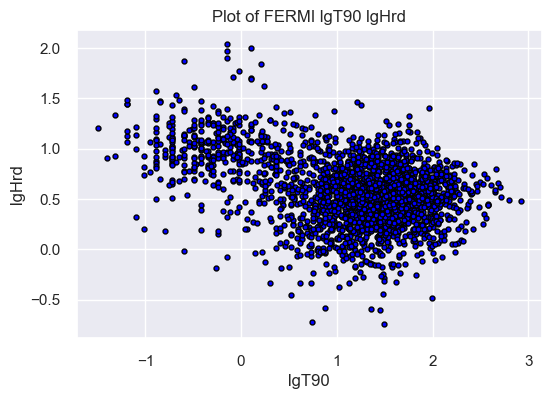

In [209]:
sns.set(font_scale=1)
df_fermi_t90_hrd = data_operations.load(cat_name="fermi",
                                        feats=["lgT90", "lgHrd"],
                                        without_outliers=True,
                                        plot_data=True,
                                        verbose=True)

In [274]:
model_operations.createGMMs(dataset_name='fermi', 
                          data=df_fermi_t90_hrd,
                          cov_type='full',
                          n_clusters_max=10,
                          verbose=True,
                          max_iter=10000,
                          n_init=100,
                          sorting_clusters=True,
                          plot_model=False)



Overwriting on the existing model...
Model is saved to ../models/fermi/fermi_lgT90_lgHrd_N1_Cfull.model
Model with 1 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/fermi/fermi_lgT90_lgHrd_N2_Cfull.model
Model with 2 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/fermi/fermi_lgT90_lgHrd_N3_Cfull.model
Model with 3 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/fermi/fermi_lgT90_lgHrd_N4_Cfull.model
Model with 4 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/fermi/fermi_lgT90_lgHrd_N5_Cfull.model
Model with 5 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/fermi/fermi_lgT90_lgHrd_N6_Cfull.model
Model with 6 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/fermi/fermi_lgT90_lgHrd_N7_Cfull.model
Model with 7 components has been

(<Figure size 640x440 with 1 Axes>,
 <Axes: title={'center': 'FERMI'}, xlabel='lgT90', ylabel='lgHrd'>)

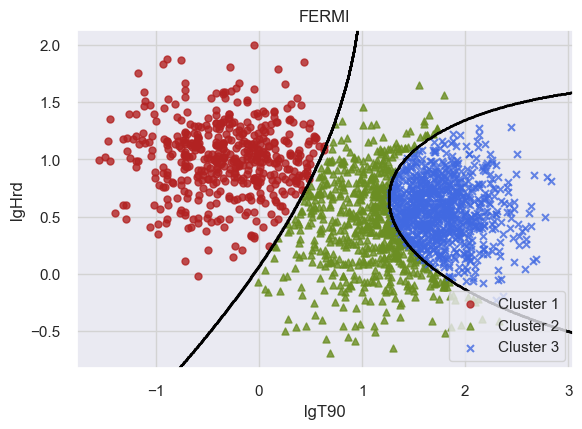

In [210]:
disp_operations.scatter2DWithClusters(cat_name="fermi",
                                      feat_space=["lgT90", "lgHrd"],
                                      n_components=3,
                                      data=df_batse_t90_hrd,
                                      title="FERMI",
                                      xlabel="lgT90",
                                      ylabel="lgHrd",)

### 2.2. Calculate Performance Scores  

In [211]:
# Bring all models
models_fermi = model_operations.bring_all_models(cat_name="fermi",
                                  feat_space=["lgT90", "lgHrd"])

# Bring all predictions
preds_fermi = model_operations.bring_all_predictions(cat_name = "fermi", 
                             feat_space = ["lgT90", "lgHrd"], 
                             data = df_fermi_t90_hrd)  

# Keep scores
scores_fermi = dict()

#### 2.2.1. AIC (Akaike Information Criterion)

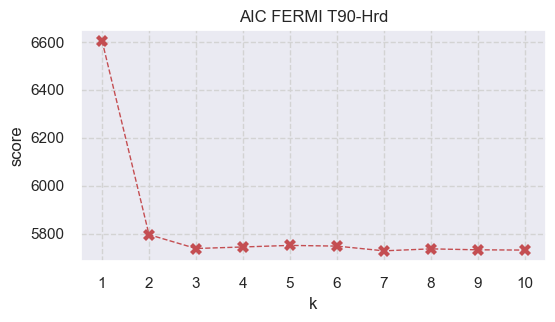

In [212]:
scores_fermi["aic"] = {k: model.aic(df_fermi_t90_hrd) for k, model in models_fermi.items()}
disp_operations.plot_scores(scores_fermi["aic"], "AIC FERMI T90-Hrd")

#### 2.2.2. BIC (Bayesian Information Criterion)

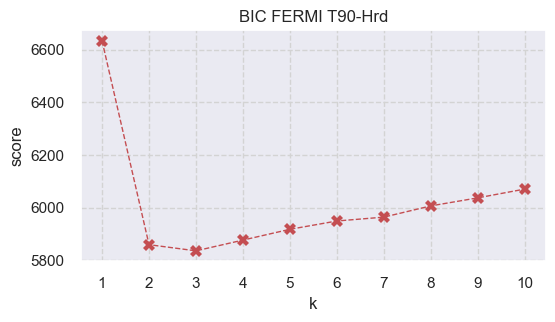

In [213]:
scores_fermi["bic"] = {k: model.bic(df_fermi_t90_hrd) for k, model in models_fermi.items()}
disp_operations.plot_scores(scores_fermi["bic"], "BIC FERMI T90-Hrd")

#### 2.2.3. WCSS (Within-Cluster Sum of Squares)

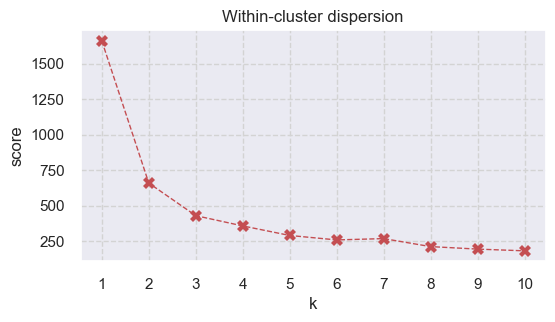

In [214]:
scores_fermi["wcss"] = {
    k: stats_operations.intra_cluster_dispersion(df_fermi_t90_hrd.values, preds_fermi[k]) for k in models_fermi.keys()
}
disp_operations.plot_scores(scores_fermi["wcss"], "Within-cluster dispersion")


#### 2.2.4 Silhouette Score

Euclidean distance

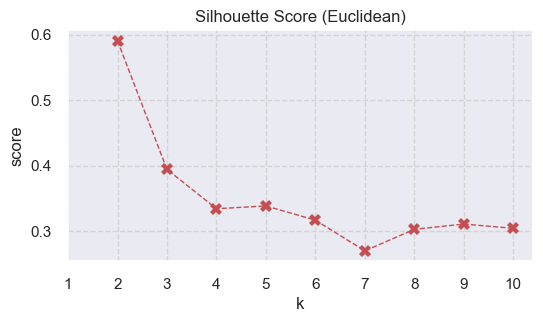

In [215]:
scores_fermi["sil_euc"] = {
    k: stats_operations.silhouette_score(df_fermi_t90_hrd.values, preds_fermi[k], metric="Euclidean")["mean"]
    for k in models_fermi.keys()
}

disp_operations.plot_scores(scores_fermi["sil_euc"], "Silhouette Score (Euclidean)")

Mahalanobis distance

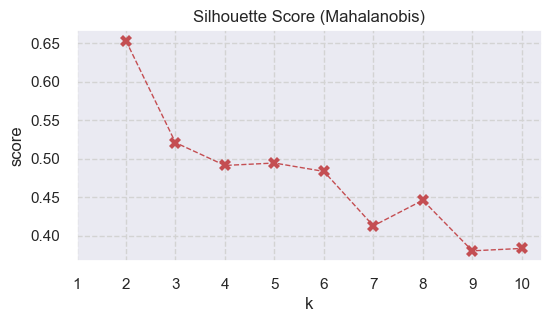

In [216]:
scores_fermi["sil_mah"] = {
    k: stats_operations.silhouette_score(df_fermi_t90_hrd, preds_fermi[k], metric="Mahalanobis")["mean"]
    for k in models_fermi.keys()
}

disp_operations.plot_scores(scores_fermi["sil_mah"], "Silhouette Score (Mahalanobis)")

#### 2.2.5. Gap Statistics

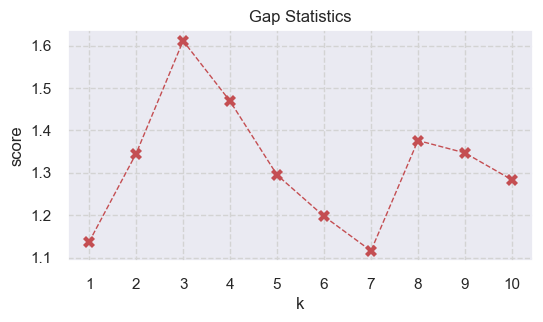

In [217]:
scores_fermi["gap"] = {
    k: stats_operations.gap_statistics(
        df_fermi_t90_hrd.values, preds_fermi[k], clusterer=models[k], n_repeat=10, random_state=22
    )["gap"]
    for k in models_fermi.keys()
}

disp_operations.plot_scores(scores_fermi["gap"], "Gap Statistics")

#### 2.2.6. Davies-Bouldin

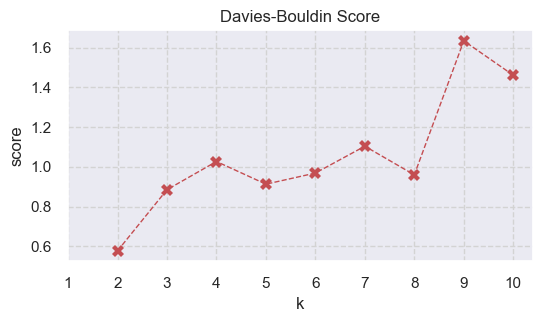

In [218]:
scores_fermi["dbs"] = {k: stats_operations.davies_bouldin_score(df_fermi_t90_hrd, preds_fermi[k]) for k in models_fermi.keys()}

disp_operations.plot_scores(scores_fermi["dbs"], "Davies-Bouldin Score")

#### 2.2.7. Calinski-Harabasz

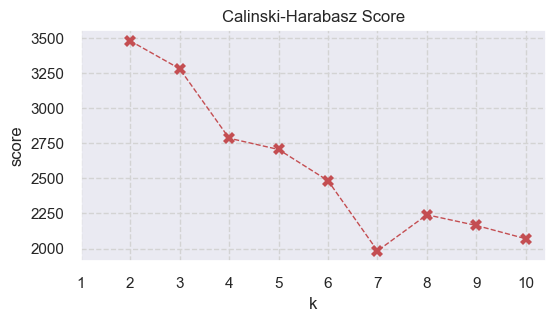

In [219]:
scores_fermi["chs"] = {
    k: stats_operations.calinski_harabasz_score(df_fermi_t90_hrd, preds_fermi[k]) for k in models_fermi.keys()
}

disp_operations.plot_scores(scores_fermi["chs"], "Calinski-Harabasz Score")

### 2.3. Merging and Normalizing Scores

In [221]:
df_merged_scores_fermi = data_operations.merge_scores(scores_fermi)
df_merged_scores_fermi

,aic,bic,chs,dbs,gap,sil_euc,sil_mah,wcss
k,,,,,,,,
1,6604.95,6633.63,NaN,NaN,1.14,NaN,NaN,1661.85
2,5796.90,5860.01,3482.15,0.58,1.35,0.59,0.65,659.14
3,5739.14,5836.66,3283.18,0.89,1.61,0.39,0.52,429.43
4,5745.51,5877.45,2787.39,1.03,1.47,0.33,0.49,356.90
5,5752.06,5918.42,2706.86,0.91,1.30,0.34,0.49,289.70
6,5749.13,5949.92,2484.34,0.97,1.20,0.32,0.48,258.20
7,5729.42,5964.62,1983.57,1.10,1.12,0.27,0.41,267.58
8,5737.64,6007.26,2240.84,0.96,1.38,0.30,0.45,211.14
9,5733.67,6037.71,2164.51,1.64,1.35,0.31,0.38,193.51


In [222]:
df_normalized_scores_fermi = data_operations.normalize_scores(df_merged_scores_fermi)
df_normalized_scores_fermi

,aic,bic,chs,dbs,gap,sil_euc,sil_mah,wcss
k,,,,,,,,
2,0.00,0.90,1.00,1.00,0.47,1.00,1.00,0.00
3,0.86,1.00,0.87,0.71,1.00,0.38,0.52,0.48
4,0.76,0.83,0.54,0.58,0.71,0.19,0.41,0.63
5,0.66,0.65,0.48,0.69,0.37,0.22,0.41,0.77
6,0.71,0.52,0.33,0.63,0.16,0.16,0.37,0.84
7,1.00,0.45,0.00,0.51,0.00,0.00,0.11,0.82
8,0.88,0.27,0.17,0.64,0.53,0.09,0.26,0.94
9,0.94,0.14,0.12,0.00,0.47,0.12,0.00,0.97
10,0.95,0.00,0.06,0.17,0.33,0.09,0.00,1.00


### 2.4. Visualizing Statistics

#### 2.4.1. Line Plot

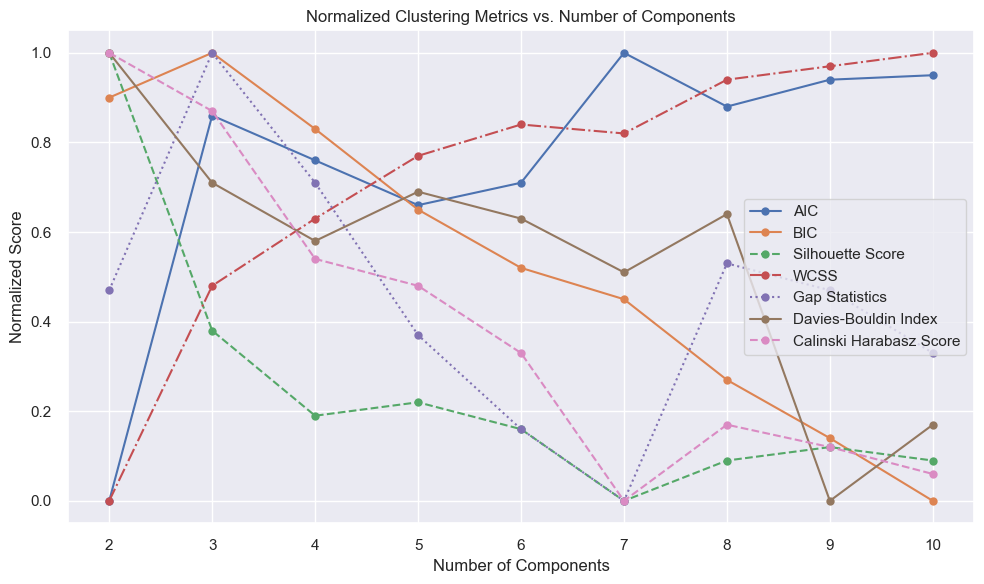

In [223]:
disp_operations.plot_scores_all(df_normalized_scores_fermi)

#### 2.4.1. Radar Plot

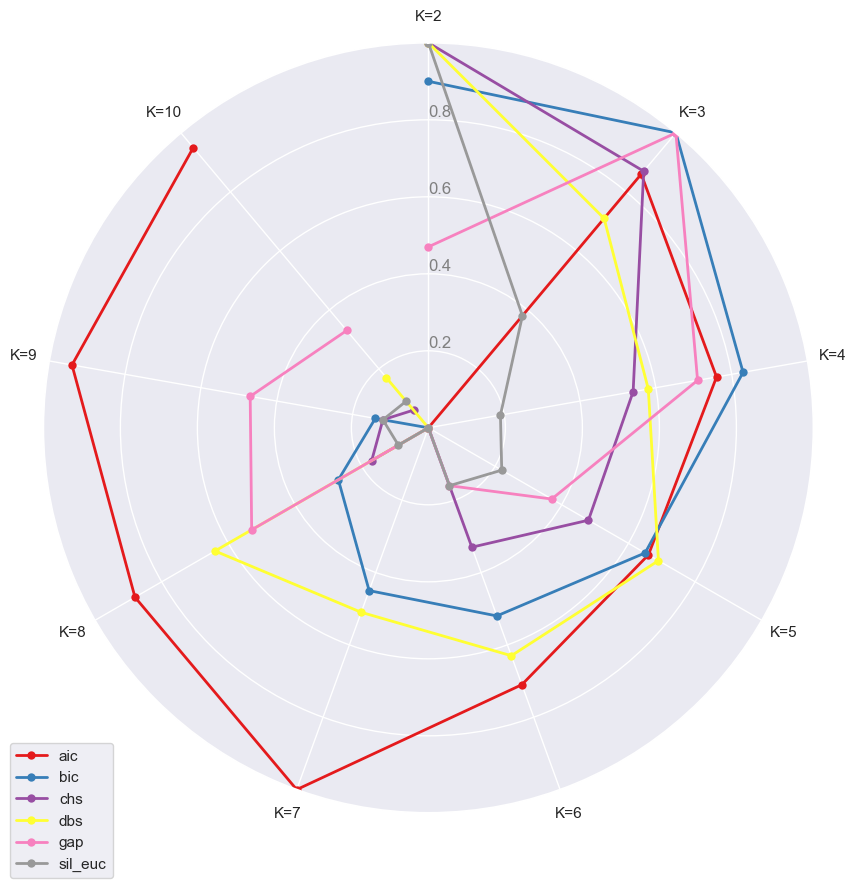

In [224]:
disp_operations.plot_radar(df_normalized_scores_fermi)

#### 2.4.3. Parallel Coordinates

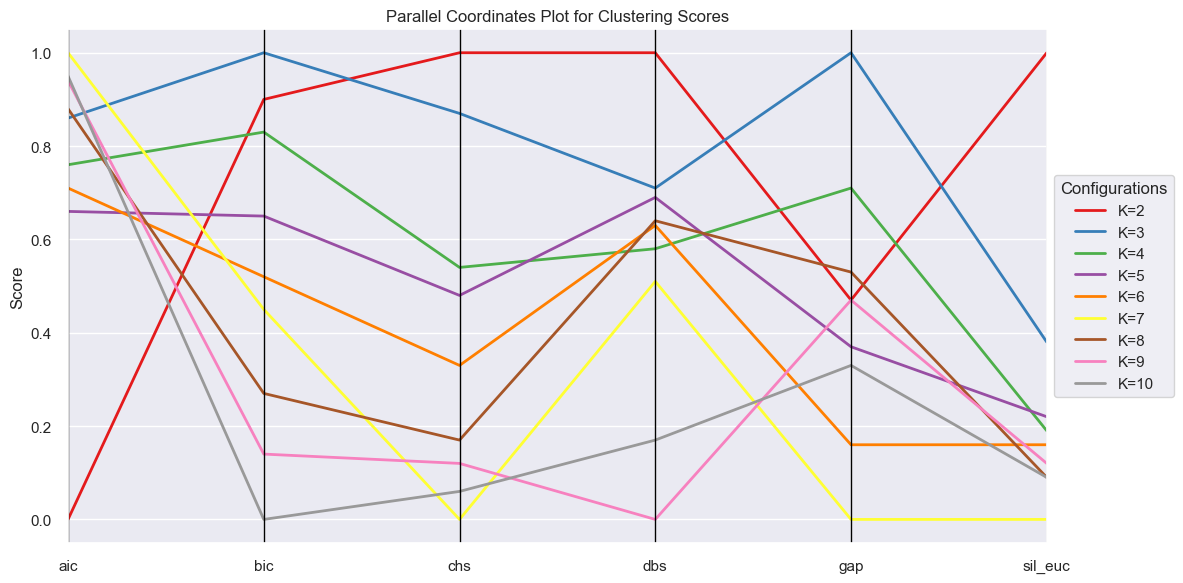

In [225]:
disp_operations.plot_parallel_coord(df_normalized_scores_fermi)

#### 2.4.4. Heatmap

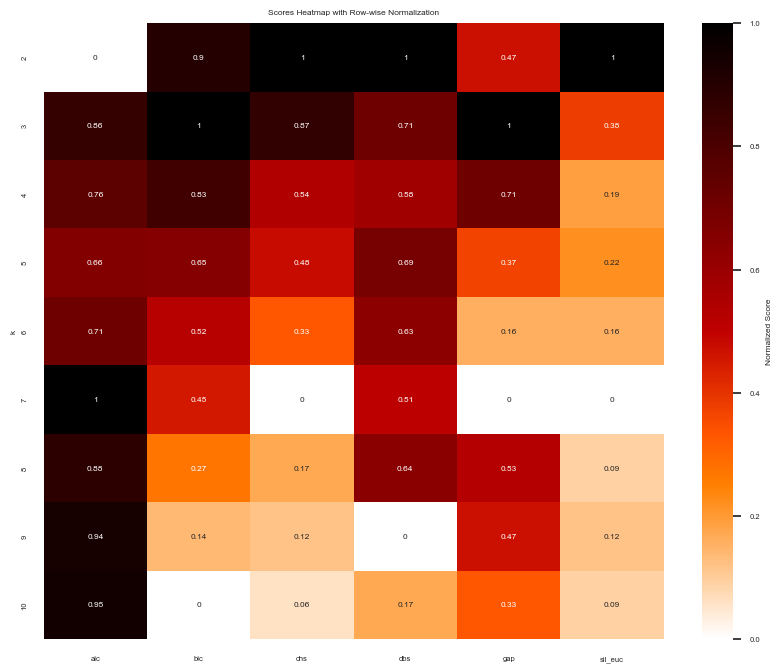

In [226]:
disp_operations.plot_heatmap(df_normalized_scores_fermi)

-----

## 3. SWIFT

### 3.1. Load Data and Create Models

--------------------------
Catalogue SWIFT loaded.
Number of GRBs: 1470
Number of features: 2
Features: Index(['lgT90', 'lgHrd'], dtype='object')
--------------------------


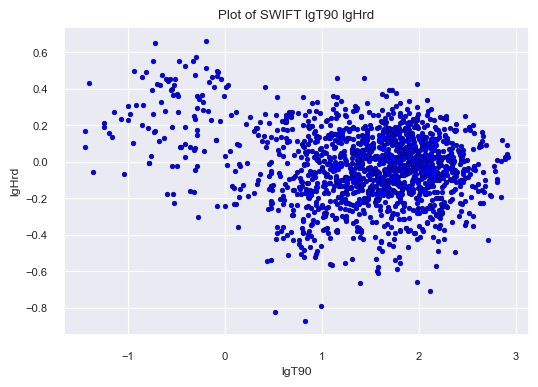

In [227]:
df_swift_t90_hrd = data_operations.load(cat_name="swift",
                                        feats=["lgT90", "lgHrd"],
                                        without_outliers=True,
                                        plot_data=True,
                                        verbose=True)

In [276]:
model_operations.createGMMs(dataset_name='swift', 
                          data=df_swift_t90_hrd,
                          cov_type='full',
                          n_clusters_max=10,
                          verbose=True,
                          max_iter=10000,
                          n_init=100,
                          sorting_clusters=True,
                          plot_model=False)



Overwriting on the existing model...
Model is saved to ../models/swift/swift_lgT90_lgHrd_N1_Cfull.model
Model with 1 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/swift/swift_lgT90_lgHrd_N2_Cfull.model
Model with 2 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/swift/swift_lgT90_lgHrd_N3_Cfull.model
Model with 3 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/swift/swift_lgT90_lgHrd_N4_Cfull.model
Model with 4 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/swift/swift_lgT90_lgHrd_N5_Cfull.model
Model with 5 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/swift/swift_lgT90_lgHrd_N6_Cfull.model
Model with 6 components has been saved.
Overwriting on the existing model...
Model is saved to ../models/swift/swift_lgT90_lgHrd_N7_Cfull.model
Model with 7 components has been

(<Figure size 640x440 with 1 Axes>,
 <Axes: title={'center': 'SWIFT'}, xlabel='lgT90', ylabel='lgHrd'>)

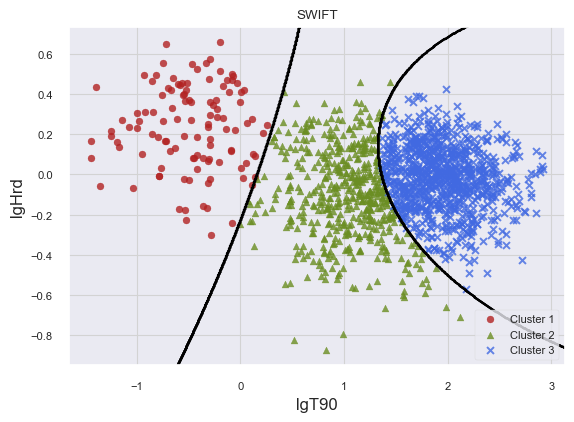

In [239]:
disp_operations.scatter2DWithClusters(cat_name="swift",
                                      feat_space=["lgT90", "lgHrd"],
                                      n_components=3,
                                      data=df_swift_t90_hrd,
                                      title="SWIFT",
                                      xlabel="lgT90",
                                      ylabel="lgHrd",)

### 3.2. Calculate Performance Scores  

In [240]:
# Bring all models
models_swift = model_operations.bring_all_models(cat_name="swift",
                                  feat_space=["lgT90", "lgHrd"])

# Bring all predictions
preds_swift = model_operations.bring_all_predictions(cat_name = "swift", 
                             feat_space = ["lgT90", "lgHrd"], 
                             data = df_swift_t90_hrd)  

# Keep scores
scores_swift = dict()

#### 3.2.1. AIC (Akaike Information Criterion)

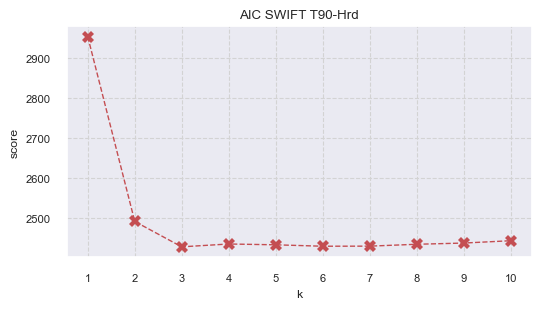

In [241]:
scores_swift["aic"] = {k: model.aic(df_swift_t90_hrd) for k, model in models_swift.items()}
disp_operations.plot_scores(scores_swift["aic"], "AIC SWIFT T90-Hrd")

#### 3.2.2. BIC (Bayesian Information Criterion)

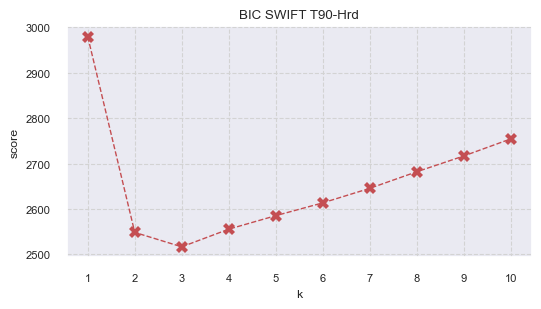

In [242]:
scores_swift["bic"] = {k: model.bic(df_swift_t90_hrd) for k, model in models_swift.items()}
disp_operations.plot_scores(scores_swift["bic"], "BIC SWIFT T90-Hrd")

#### 3.2.3. WCSS (Within-Cluster Sum of Squares)

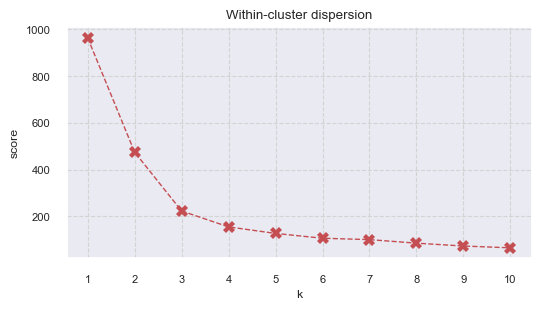

In [243]:
scores_swift["wcss"] = {
    k: stats_operations.intra_cluster_dispersion(df_swift_t90_hrd.values, preds_swift[k]) for k in models_swift.keys()
}
disp_operations.plot_scores(scores_swift["wcss"], "Within-cluster dispersion")


#### 3.2.4 Silhouette Score

Euclidean distance

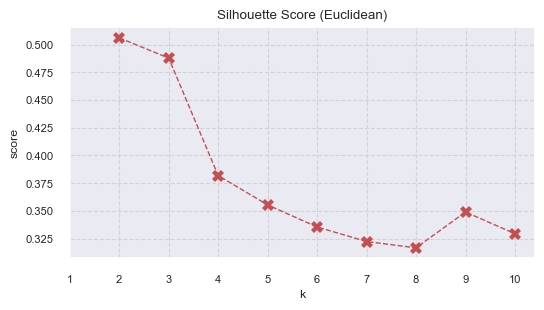

In [244]:
scores_swift["sil_euc"] = {
    k: stats_operations.silhouette_score(df_swift_t90_hrd.values, preds_swift[k], metric="Euclidean")["mean"]
    for k in models_swift.keys()
}

disp_operations.plot_scores(scores_swift["sil_euc"], "Silhouette Score (Euclidean)")

Mahalanobis distance

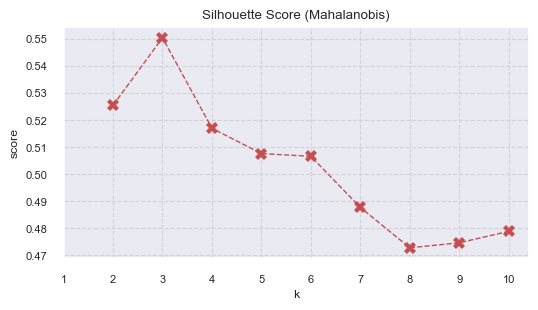

In [245]:
scores_swift["sil_mah"] = {
    k: stats_operations.silhouette_score(df_swift_t90_hrd, preds_swift[k], metric="Mahalanobis")["mean"]
    for k in models_swift.keys()
}

disp_operations.plot_scores(scores_swift["sil_mah"], "Silhouette Score (Mahalanobis)")

#### 3.2.5. Gap Statistics

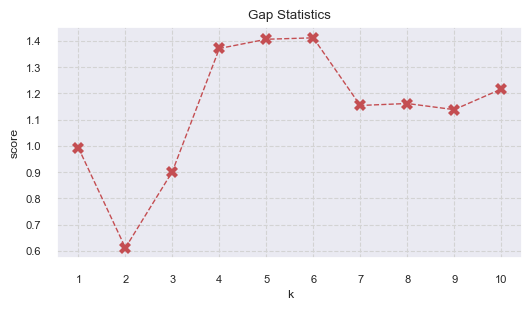

In [246]:
scores_swift["gap"] = {
    k: stats_operations.gap_statistics(
        df_swift_t90_hrd.values, preds_swift[k], clusterer=models[k], n_repeat=10, random_state=22
    )["gap"]
    for k in models_swift.keys()
}

disp_operations.plot_scores(scores_swift["gap"], "Gap Statistics")

#### 3.2.6. Davies-Bouldin

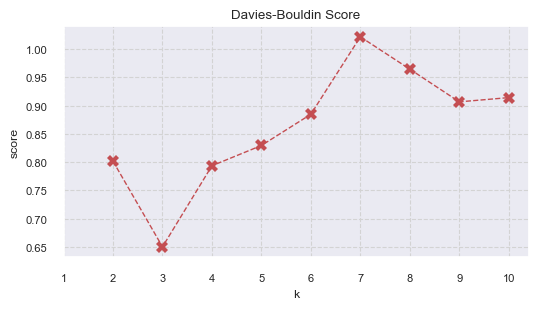

In [247]:
scores_swift["dbs"] = {k: stats_operations.davies_bouldin_score(df_swift_t90_hrd, preds_swift[k]) for k in models_swift.keys()}

disp_operations.plot_scores(scores_swift["dbs"], "Davies-Bouldin Score")

#### 3.2.7. Calinski-Harabasz

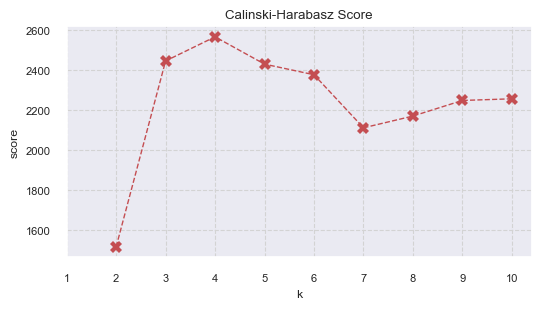

In [248]:
scores_swift["chs"] = {
    k: stats_operations.calinski_harabasz_score(df_swift_t90_hrd, preds_swift[k]) for k in models_swift.keys()
}

disp_operations.plot_scores(scores_swift["chs"], "Calinski-Harabasz Score")

### 3.3. Merging and Normalizing Scores

In [249]:
df_merged_scores_swift = data_operations.merge_scores(scores_swift)
df_merged_scores_swift

,aic,bic,chs,dbs,gap,sil_euc,sil_mah,wcss
k,,,,,,,,
1,2952.82,2979.29,NaN,NaN,0.99,NaN,NaN,963.96
2,2490.25,2548.48,1516.23,0.80,0.61,0.51,0.53,474.19
3,2426.75,2516.73,2443.32,0.65,0.90,0.49,0.55,222.57
4,2433.86,2555.60,2563.52,0.79,1.37,0.38,0.52,154.33
5,2431.83,2585.32,2427.39,0.83,1.41,0.36,0.51,126.38
6,2428.25,2613.51,2374.42,0.88,1.41,0.34,0.51,105.82
7,2428.46,2645.47,2109.79,1.02,1.15,0.32,0.49,99.87
8,2433.17,2681.94,2168.43,0.96,1.16,0.32,0.47,84.69
9,2436.19,2716.72,2246.25,0.91,1.14,0.35,0.47,72.48


In [250]:
df_normalized_scores_swift = data_operations.normalize_scores(df_merged_scores_swift)
df_normalized_scores_swift

,aic,bic,chs,dbs,gap,sil_euc,sil_mah,wcss
k,,,,,,,,
2,0.00,0.87,0.00,0.59,0.00,1.00,0.75,0.00
3,1.00,1.00,0.89,1.00,0.36,0.89,1.00,0.61
4,0.89,0.84,1.00,0.62,0.95,0.32,0.62,0.78
5,0.92,0.71,0.87,0.51,1.00,0.21,0.50,0.85
6,0.98,0.59,0.82,0.38,1.00,0.11,0.50,0.90
7,0.97,0.46,0.57,0.00,0.68,0.00,0.25,0.91
8,0.90,0.30,0.62,0.16,0.69,0.00,0.00,0.95
9,0.85,0.16,0.70,0.30,0.66,0.16,0.00,0.98
10,0.76,0.00,0.70,0.30,0.76,0.05,0.12,1.00


### 3.4. Visualizing Statistics

#### 3.4.1. Line Plot

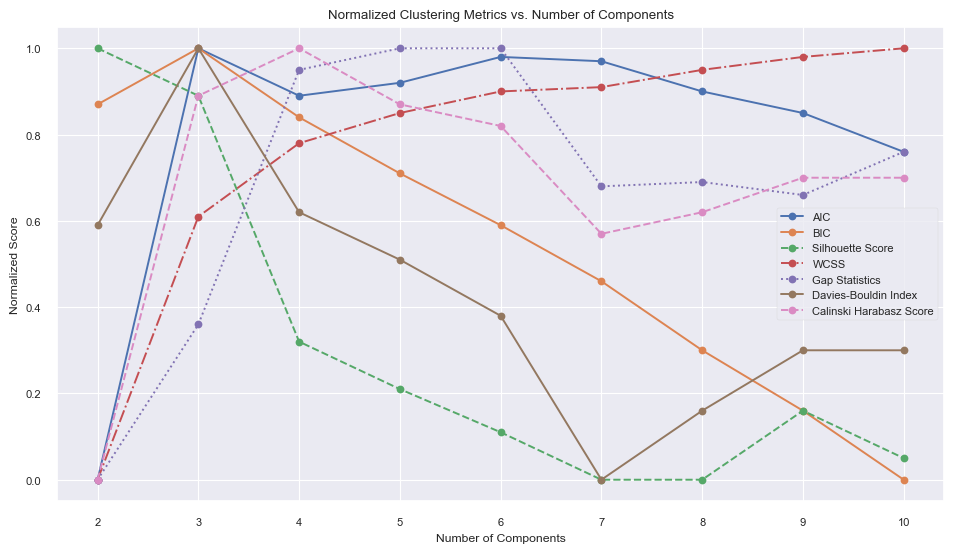

In [251]:
disp_operations.plot_scores_all(df_normalized_scores_swift)

#### 3.4.2. Radar Plot

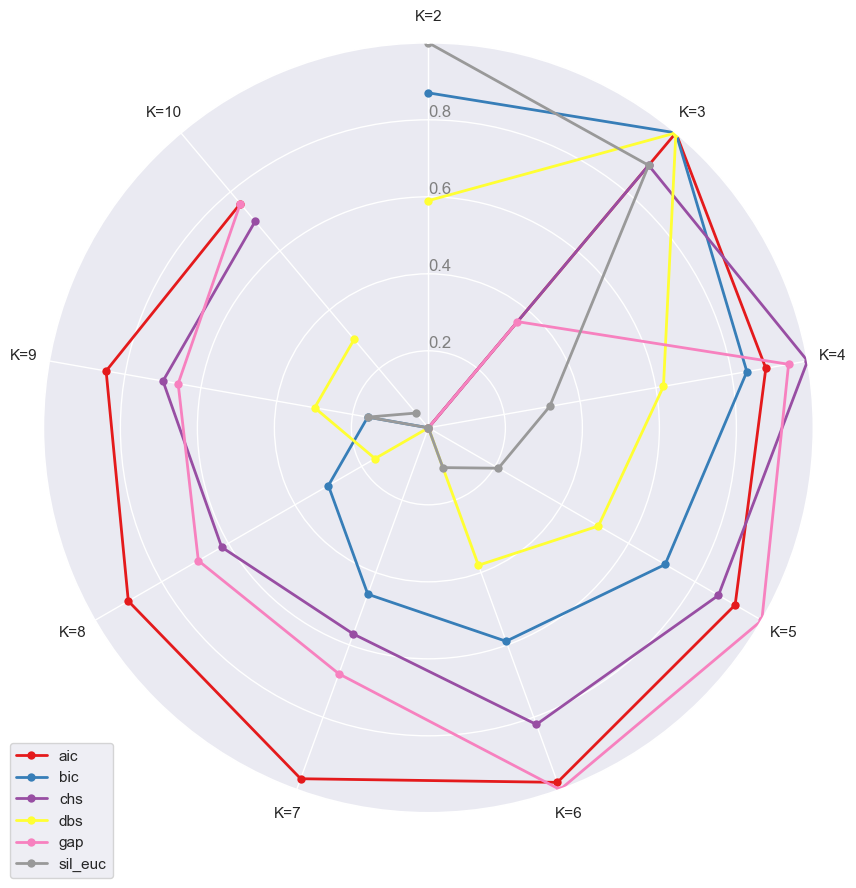

In [256]:
disp_operations.plot_radar(df_normalized_scores_swift)

#### 3.4.3. Parallel Coordinates

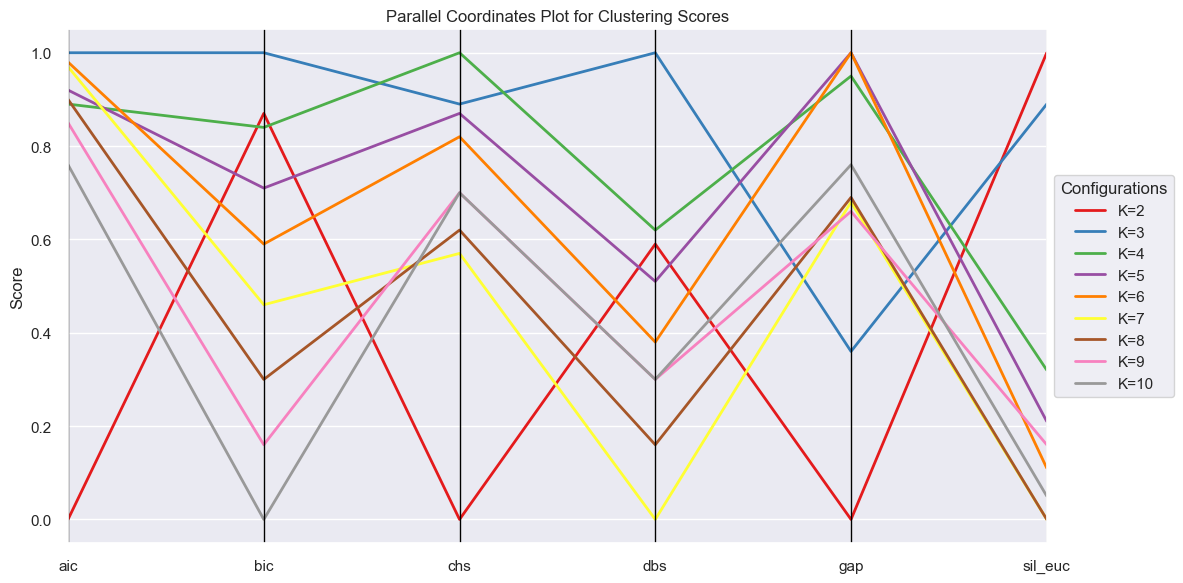

In [257]:
disp_operations.plot_parallel_coord(df_normalized_scores_swift)

#### 3.4.4. Heatmap

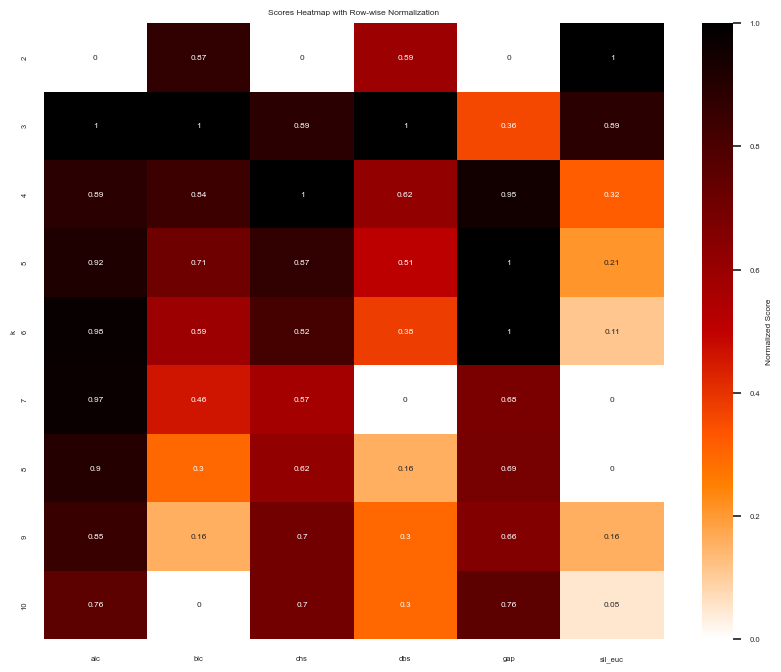

In [258]:
disp_operations.plot_heatmap(df_normalized_scores_swift)